In [1]:
import numpy as np
import sympy as sym
from IPython.display import SVG, display
from matrixlayout.ge import render_ge_svg

# Block Jordan Form: Single Matrix with Symbols

Block-diagonal Jordan form with two 2x2 blocks and one 1x1 block.
Outlines and background fills emphasize each diagonal block.
Single matrices default to grid position (0,0), so `grid` is optional in decorations.


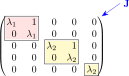

In [2]:
lam1, lam2 = sym.symbols("\\lambda_1 \lambda_2")
J1 = sym.Matrix([[lam1, 1], [0, lam1]])
J2 = sym.Matrix([[lam2, 1], [0, lam2]])
J3 = sym.Matrix([[lam2]])

J = sym.diag(J1, J2, J3)

decorations = [
    {"submatrix": ((0, 1), (0, 1)), "background": "red!10"},
    {"submatrix": ((2, 3), (2, 3)), "background": "yellow!20"},
    {"submatrix": ((4, 4), (4, 4)), "background": "yellow!20"},
    {"submatrix": ("0:1", "0:1"),   "outline": True, "padding_pt": 2.0},
    {"submatrix": ("2:3", "2:3"),   "outline": True, "padding_pt": 2.0},
    {"submatrix": ("4:4", "4:4"),   "outline": True, "padding_pt": 2.0},
    {"label": r"\mathbf{J}", "side": "right", "angle": -35, "length": 8},
]

svg = render_ge_svg(
    matrices=J,
    decorations=decorations,
)
display(SVG(svg))

# Rational Entries

Exact rationals render cleanly with `sympy.Rational`. If the fractions feel cramped,
use a formatter that replaces `\frac` with `\tfrac` and increase `\arraystretch`.
Note that `\arraystretch` affects all rows in the matrix, so keep it modest.


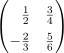

In [3]:
from sympy import Rational, latex

R = sym.Matrix([[Rational(1, 2), Rational(3, 4)], [Rational(-2, 3), Rational(5, 6)]])
fmt = lambda x: latex(x).replace(r"\frac", r"\tfrac")
svg = render_ge_svg(
    matrices=R,
    formatter=fmt,
    extension=r"\renewcommand{\arraystretch}{1.5}", # improve row spacing
    fig_scale=1.5,
)
display(SVG(svg))


# Complex Entries

Complex entries use `sympy.I`.


In [4]:
Cplx = sym.Matrix([[1 + 2*sym.I, -sym.I], [3, 4 - sym.I]])
svg = render_ge_svg(matrices=Cplx)
display(SVG(svg))

Decorations are expressed as one-line dicts;  
call `matrixlayout.ge.decorations_help()`
for the full schema summary.

# Stack of Matrices and Decorators
Start with a simple matrix product stack.

Expected output: a 3x2 grid with A, B, C, AB, and ABC blocks.
NumPy arrays work as well as `sympy.Matrix`; the renderer will call `.tolist()` when needed.


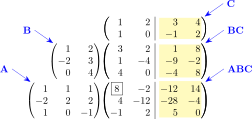

In [5]:
C = np.array([[1, 2, 3, 4], [1,0, -1,2]])
B = np.array([[1,2], [-2,3], [0,4]])
A = np.array([[1,1,1], [-2,2,2], [1,0,-1]])
BC = B@C
ABC= A@BC
matrices = [[None, C], [B, BC], [A, ABC]]

decorations = [
    # background
    {"grid": (0, 1), "submatrix": (None, "2:3"), "background": "yellow!25"},
    {"grid": (1, 1), "submatrix": (None, "2:3"), "background": "yellow!25"},
    {"grid": (2, 1), "submatrix": (None, "2:3"), "background": "yellow!25"},
    # entry decoration
    {"grid": (2, 1), "entries": [(0, 0)], "box": True},
    # hlines and vlines
    {"grid": (1, 0), "submatrix": ("0:2", None), "hlines": "bounds"},
    {"grid": (1, 1), "submatrix": ("0:2", None), "hlines": "bounds"},
    {"grid": (0, 1), "submatrix": (None, "0:1"), "vlines": "bounds"},
    {"grid": (1, 1), "submatrix": (None, "0:1"), "vlines": "bounds"},
    {"grid": (2, 1), "submatrix": (None, "0:1"), "vlines": "bounds"},
    # Matrix Labels
    {"grid": (0, 1), "label": r"\mathbf{C}", "side": "right", "angle": -35, "length": 8},
    {"grid": (1, 0), "label": r"\mathbf{B}", "side": "left", "angle": -35, "length": 8},
    {"grid": (1, 1), "label": r"\mathbf{B C}", "side": "right", "angle": -35, "length": 8},
    {"grid": (2, 0), "label": r"\mathbf{A}", "side": "left", "angle": -35, "length": 8},
    {"grid": (2, 1), "label": r"\mathbf{A B C}", "side": "right", "angle": -35, "length": 8},
]

svg = render_ge_svg(
    matrices=matrices,
    decorations=decorations,
    create_medium_nodes=True,
    block_align="right",
    block_valign="bottom",
)
display(SVG(svg))

# More Information

For decoration syntax, see `matrixlayout.ge.decorations_help()` or the `decorators.md` page.  
Use `help(matrixlayout.ge.render_ge_svg)` and `help(matrixlayout.ge.render_ge_tex)` for parameter details.
